In [19]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

In [20]:
mp_pose = mp.solutions.pose
 
pose_image = mp_pose.Pose(static_image_mode=True, 
                          min_detection_confidence=0.5)
 
pose_video = mp_pose.Pose(static_image_mode=False, 
                          min_detection_confidence=0.7,
                          min_tracking_confidence=0.7)
 
mp_drawing = mp.solutions.drawing_utils

pose = mp_pose.Pose()

In [21]:
def detectPose(image_pose, pose, draw=False):
    original_image = image_pose.copy()
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    resultant = pose.process(image_in_RGB)
    if resultant.pose_landmarks and draw:    
        mp_drawing.draw_landmarks(image=original_image, 
                                  landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                               thickness=2, circle_radius=2),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                               thickness=2, circle_radius=2))
        mp_drawing.plot_landmarks(resultant.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
            
    return original_image, resultant


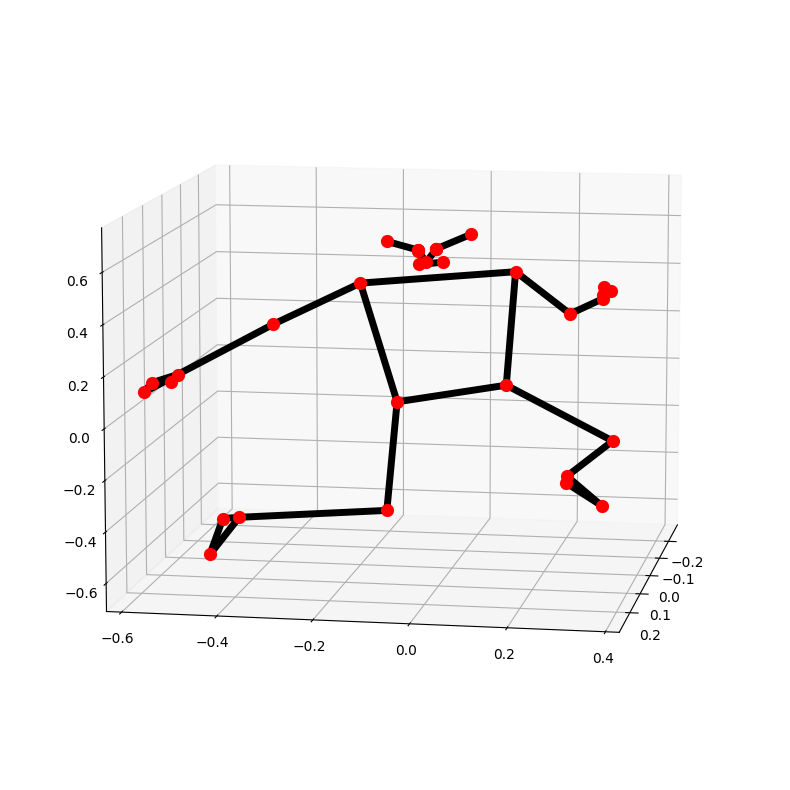

In [25]:
# PREPARING IMAGE
image = cv2.imread("test_slika2.jpg")
slika, res = detectPose(image, pose, True)
slika = cv2.cvtColor(slika, cv2.COLOR_BGR2RGB)


In [23]:
# PREPARING DATA - DICTIONARY WITH POINTS ON ALL AXIS

points = []
for data_point in res.pose_landmarks.landmark:
    points.append({
                    'X': data_point.x,
                    'Y': data_point.y,
                    'Z': data_point.z,
                    'Visibility': data_point.visibility})

spineTopX1 = points[11]["X"]
spineTopY1 = points[11]["Y"]
spineTopZ1 = points[11]["Z"]

spineTopX2 = points[12]["X"]
spineTopY2 = points[12]["Y"]
spineTopZ2 = points[12]["Z"]

spineBotX1 = points[23]["X"]
spineBotY1 = points[23]["Y"]
spineBotZ1 = points[23]["Z"]

spineBotX2 = points[24]["X"]
spineBotY2 = points[24]["Y"]
spineBotZ2 = points[24]["Z"]

vec1 = np.array([spineTopX1, spineTopY1, spineTopZ1])
vec2 = np.array([spineTopX2, spineTopY2, spineTopZ2])

vec3 = np.array([spineBotX1, spineBotY1, spineBotZ1])
vec4 = np.array([spineBotX2, spineBotY2, spineBotZ2])

spineTop = (vec1 + vec2) / 2
spineBot = (vec3 + vec4) / 2


In [26]:
for d in res.pose_landmarks.landmark[10:25]:
    print(d)

x: 0.48752376437187195
y: 0.2703632116317749
z: -0.4289841949939728
visibility: 0.9999536275863647

x: 0.5445112586021423
y: 0.3318268358707428
z: 0.1264459788799286
visibility: 0.9999743103981018

x: 0.40357595682144165
y: 0.31136354804039
z: -0.2565760612487793
visibility: 0.99985271692276

x: 0.615962028503418
y: 0.42148837447166443
z: 0.09624592214822769
visibility: 0.9924364686012268

x: 0.2992772161960602
y: 0.39816614985466003
z: -0.32869407534599304
visibility: 0.9985826015472412

x: 0.6863754391670227
y: 0.35259848833084106
z: -0.18266895413398743
visibility: 0.9942030906677246

x: 0.1950175166130066
y: 0.4686186611652374
z: -0.49526548385620117
visibility: 0.9959824085235596

x: 0.7092843055725098
y: 0.32990512251853943
z: -0.2234601229429245
visibility: 0.9786317944526672

x: 0.15608954429626465
y: 0.47982171177864075
z: -0.534008800983429
visibility: 0.9815542101860046

x: 0.699334979057312
y: 0.32226675748825073
z: -0.23397956788539886
visibility: 0.9789633750915527

x: 0.

In [27]:
import bpy
import mathutils

# Define the mediapipe landmarks and their corresponding bone names in Blender
landmarks = {
    0: 'Head',
    1: 'Neck',
    2: 'Right shoulder',
    3: 'Right elbow',
    4: 'Right wrist',
    5: 'Left shoulder',
    6: 'Left elbow',
    7: 'Left wrist',
    8: 'Hip',
    9: 'Right hip',
    10: 'Right knee',
    11: 'Right ankle',
    12: 'Left hip',
    13: 'Left knee',
    14: 'Left ankle',
    15: 'Right eye',
    16: 'Left eye',
    17: 'Right ear',
    18: 'Left ear'
}

# Define the Blender armature object and its bone names
armature_obj = bpy.data.objects['Armature']
bone_names = [bone.name for bone in armature_obj.data.bones]

# Define the 3D coordinates of the mediapipe landmarks
landmark_coords = [[0.0, 0.0, 0.0] for i in range(len(landmarks))]

# Loop through the mediapipe landmarks and get their 3D coordinates
for i in range(len(landmarks)):
    # Get the bone name for the current landmark
    bone_name = landmarks[i]
    # If the bone name exists in the Blender armature, get its 3D coordinates
    if bone_name in bone_names:
        # Get the Blender bone object and its 3D coordinates
        bone = armature_obj.pose.bones[bone_name]
        pos = bone.head
        # Convert the 3D coordinates from the bone's local space to the world space
        pos = bone.matrix @ mathutils.Vector(pos)
        landmark_coords[i] = [pos.x, pos.y, pos.z]

# Print the 3D coordinates of the mediapipe landmarks
print(landmark_coords)


KeyError: 'bpy_prop_collection[key]: key "Armature" not found'

In [ ]:
import bpy
import mathutils

# Define the Mediapipe landmarks and their corresponding bone names in Blender
mp_landmarks = [
    ('nose', 'Nose'),
    ('left_eye_inner', 'LeftEyeInner'),
    ('left_eye', 'LeftEye'),
    ('left_eye_outer', 'LeftEyeOuter'),
    ('right_eye_inner', 'RightEyeInner'),
    ('right_eye', 'RightEye'),
    ('right_eye_outer', 'RightEyeOuter'),
    ('left_ear', 'LeftEar'),
    ('right_ear', 'RightEar'),
    ('mouth_left', 'MouthLeft'),
    ('mouth_right', 'MouthRight'),
    ('mouth_center', 'MouthCenter'),
    ('left_shoulder', 'LeftShoulder'),
    ('right_shoulder', 'RightShoulder'),
    ('left_elbow', 'LeftElbow'),
    ('right_elbow', 'RightElbow'),
    ('left_wrist', 'LeftWrist'),
    ('right_wrist', 'RightWrist'),
    ('left_pinky', 'LeftPinky'),
    ('right_pinky', 'RightPinky'),
    ('left_index', 'LeftIndex'),
    ('right_index', 'RightIndex'),
    ('left_thumb', 'LeftThumb'),
    ('right_thumb', 'RightThumb'),
    ('left_hip', 'LeftHip'),
    ('right_hip', 'RightHip'),
    ('left_knee', 'LeftKnee'),
    ('right_knee', 'RightKnee'),
    ('left_ankle', 'LeftAnkle'),
    ('right_ankle', 'RightAnkle'),
    ('left_heel', 'LeftHeel'),
    ('right_heel', 'RightHeel'),
    ('left_foot_index', 'LeftToeBase'),
    ('right_foot_index', 'RightToeBase')
]

# Define the 3D coordinates of the Mediapipe landmarks
landmark_coords = [[0.0, 0.0, 0.0] for i in range(len(mp_landmarks))]

# Loop through the Mediapipe landmarks and get their 3D coordinates
for i, landmark_name in enumerate(mp_landmarks):
    # Get the bone name for the current landmark
    bone_name = landmark_name[1]
    # Get the 3D coordinates of the current landmark
    pos = landmark_coords[i]
    # Create a new bone for the current landmark
    bone = bpy.data.armatures['Armature'].edit_bones.new(bone_name)
    # Set the head and tail positions of the bone
    bone.head = mathutils.Vector(pos)
    bone.tail = mathutils.Vector([pos[0], pos[1], pos[2]+0.1])
    # Connect the bone to its parent bone
    if i > 0:
        bone.parent = bpy.data.armatures['Armature'].edit_bones[mp_landmarks[i-1][1]]

# Create an armature object and link it to the scene
armature_obj = bpy.data.objects.new('Armature', bpy.data.armatures['Armature'])
bpy.context.collection.objects.link(armature_obj)

# Set the armature object as the active object
bpy.context.view_layer.objects.active = armature_obj

# Switch to pose mode and reset the armature to its rest position
bpy.ops.object.mode_set(mode='POSE')
bpy.ops.pose.select_all(action='SELECT')
bpy.ops.pose.transforms_clear()

# Switch back to object mode
bpy.ops.object.mode_set(mode='OBJECT')

# Print a message to indicate that


In [ ]:
import bpy

# Define the camera object
camera_obj = bpy.data.objects['Camera']

# Define the camera matrix and distortion coefficients
camera_matrix = camera_obj.data.camera_matrix
dist_coeffs = camera_obj.data.distortion_coefficients

# Define the Mediapipe landmarks and their corresponding 2D coordinates
mp_landmarks = [
    ('nose', [0.0, 0.0]),
    ('left_eye_inner', [0.0, 0.0]),
    ('left_eye', [0.0, 0.0]),
    ('left_eye_outer', [0.0, 0.0]),
    ('right_eye_inner', [0.0, 0.0]),
    ('right_eye', [0.0, 0.0]),
    ('right_eye_outer', [0.0, 0.0]),
    ('left_ear', [0.0, 0.0]),
    ('right_ear', [0.0, 0.0]),
    ('mouth_left', [0.0, 0.0]),
    ('mouth_right', [0.0, 0.0]),
    ('mouth_center', [0.0, 0.0]),
    ('left_shoulder', [0.0, 0.0]),
    ('right_shoulder', [0.0, 0.0]),
    ('left_elbow', [0.0, 0.0]),
    ('right_elbow', [0.0, 0.0]),
    ('left_wrist', [0.0, 0.0]),
    ('right_wrist', [0.0, 0.0]),
    ('left_pinky', [0.0, 0.0]),
    ('right_pinky', [0.0, 0.0]),
    ('left_index', [0.0, 0.0]),
    ('right_index', [0.0, 0.0]),
    ('left_thumb', [0.0, 0.0]),
    ('right_thumb', [0.0, 0.0]),
    ('left_hip', [0.0, 0.0]),
    ('right_hip', [0.0, 0.0]),
    ('left_knee', [0.0, 0.0]),
    ('right_knee', [0.0, 0.0]),
    ('left_ankle', [0.0, 0.0]),
    ('right_ankle', [0.0, 0.0]),
    ('left_heel', [0.0, 0.0]),
    ('right_heel', [0.0, 0.0]),
    ('left_foot_index', [0.0, 0.0]),
    ('right_foot_index', [0.0, 0.0])
]

# Define the 3D coordinates of the Mediapipe landmarks
landmark_coords = [[0.0, 0.0, 0.0] for i in range(len(mp_landmarks))]

# Loop through the Mediapipe landmarks and get their 3D coordinates
for i, landmark_name in enumerate(mp_landmarks):
    # Get the 2D coordinates of the current landmark
    x, y = landmark_name[1]
    # Get the 3D coordinates of the current landmark
    pos = camera_obj.matrix_world @ camera_matrix.inverted() @ [x, y, 1.0]
    # Add the 3D coordinates